In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
torch.manual_seed(1)

In [4]:
def load_labels(train_size, test_size):      
    trainset = datasets.MNIST('data', train = True, download = False, transform = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))
    temp = torch.tensor(np.random.randint(0, 10, (len(trainset)),))
    trainset.targets = temp
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=train_size, shuffle=True)
    testset = datasets.MNIST('data', train = False, transform = transforms.Compose([transforms.Resize((32, 32)),transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))
    test_loader = torch.utils.data.DataLoader(testset ,batch_size = test_size, shuffle=True)
    return (train_loader, test_loader)

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.cn1 = nn.Conv2d(1, 6, 5)
        self.cn2 = nn.Conv2d(6, 16, 5)
        self.lin1 = nn.Linear(16 * 5 * 5, 120)
        self.lin2 = nn.Linear(120, 84)
        self.lin3 = nn.Linear(84, 10)

    def forward(self, a):
        a = F.max_pool2d(F.relu(self.cn1(a)), 2)
        a = F.max_pool2d(F.relu(self.cn2(a)), 2)
        a = a.view(a.size()[0], -1)
        a = F.relu(self.lin1(a))
        a = F.relu(self.lin2(a))
        a = self.lin3(a)
        return a

In [6]:
train_size = 100
test_size = 100
train_loader, test_loader = load_labels(train_size, test_size)

In [7]:
def train(model, optimizer, train_loader):
    model.train()
    c = 0
    train_loss = 0
    flag = 0

    for batch, (data, target) in enumerate(train_loader):
        flag += 1
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        op = model(data)
        loss = loss_funct(op, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.data

        predict = np.argmax(op.data, axis=1)
        c+= np.equal(predict, target.data).sum()
    
    train_loss = (train_loss * 100) / len(train_loader.dataset)
    acc = 100.0 * c / len(train_loader.dataset)
    return train_loss, acc

In [8]:
def test(model, epoch, test_loader):
    model.eval()
    tot_loss = 0
    c = 0
    for data, target in test_loader:
        data, target = Variable(data), Variable(target)
        output = model(data)
        loss = loss_funct(output, target)
        tot_loss += loss.data
        predict = np.argmax(output.data, axis = 1)
        c = c + np.equal(predict, target.data).sum()
    tot_loss = (tot_loss * 100) / len(test_loader.dataset)
    print('\nTest set, Epoch {} , Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(epoch,
        tot_loss, c, len(test_loader.dataset),
        100. * c / len(test_loader.dataset)))
    return tot_loss

In [9]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train1 = []
test1 = []
e1 = []
epochs = 30
loss_funct = nn.CrossEntropyLoss()
for epoch in range(1, epochs + 1):
    e_train_loss, accuracy = train(model, optimizer, train_loader)
    train1.append(e_train_loss)
    test_loss = test(model, epoch, test_loader)
    test1.append(test_loss)
    e1.append(epoch)


Test set, Epoch 1 , Average loss: 2.3041, Accuracy: 892/10000 (9%)


Test set, Epoch 2 , Average loss: 2.3030, Accuracy: 977/10000 (10%)


Test set, Epoch 3 , Average loss: 2.3029, Accuracy: 1032/10000 (10%)


Test set, Epoch 4 , Average loss: 2.3037, Accuracy: 999/10000 (10%)


Test set, Epoch 5 , Average loss: 2.3033, Accuracy: 1032/10000 (10%)


Test set, Epoch 6 , Average loss: 2.3041, Accuracy: 1032/10000 (10%)


Test set, Epoch 7 , Average loss: 2.3006, Accuracy: 988/10000 (10%)


Test set, Epoch 8 , Average loss: 2.3051, Accuracy: 597/10000 (6%)


Test set, Epoch 9 , Average loss: 2.2988, Accuracy: 1388/10000 (14%)


Test set, Epoch 10 , Average loss: 2.3075, Accuracy: 1279/10000 (13%)


Test set, Epoch 11 , Average loss: 2.3058, Accuracy: 1309/10000 (13%)


Test set, Epoch 12 , Average loss: 2.3119, Accuracy: 1145/10000 (11%)


Test set, Epoch 13 , Average loss: 2.3003, Accuracy: 1081/10000 (11%)


Test set, Epoch 14 , Average loss: 2.2999, Accuracy: 1079/10000 (11%)


Test se

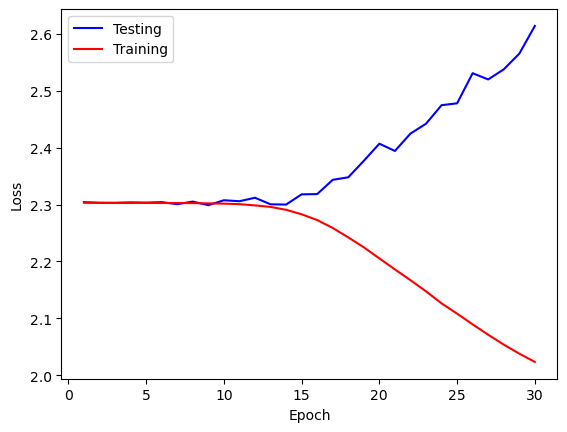

In [10]:
plt.plot(e1, test1, color = "blue")
plt.plot(e1, train1, color = "red")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Testing', 'Training'])
plt.show()